In [1]:
import pandas as pd
import numpy as np

# Carregar os dados do arquivo CSV
arquivo = pd.read_csv('https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/datasets/AirQualityUCI.csv', sep=';')

arquivo.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [2]:
coluna_convert = ["CO(GT)","C6H6(GT)","T","RH","AH"]

# Substituir vírgulas por pontos e converter colunas numéricas para float
for col in coluna_convert:
    arquivo[col] = arquivo[col].astype(str).str.replace(',', '.').astype(float)
    
arquivo.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
# Remover colunas vazias
arquivo = arquivo.dropna(axis=1, how='all')

# Remover linhas vazias
arquivo = arquivo.dropna(axis=0, how='all')


In [4]:
# Informações gerais sobre o dataset
print(arquivo.info())

# Descrição estatística das variáveis numéricas
print(arquivo.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB
None
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.0000

In [5]:
# Substituir -200 por NaN
arquivo.replace(-200, np.nan, inplace=True)
print(arquivo.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.206794   398.484288   
min       2

In [6]:
# Preenchendo valores ausentes com a mediana de cada coluna
for column in arquivo.columns:
    if arquivo[column].isnull().any():
        arquivo[column].fillna(arquivo[column].median(), inplace=True)

In [7]:

arquivo['PT08.S1(CO)'] = arquivo['PT08.S1(CO)'].astype(int)
arquivo['NMHC(GT)'] = arquivo['NMHC(GT)'].astype(int)
arquivo['PT08.S2(NMHC)'] = arquivo['PT08.S2(NMHC)'].astype(int)
arquivo['NOx(GT)'] = arquivo['NOx(GT)'].astype(int)
arquivo['PT08.S3(NOx)'] = arquivo['PT08.S3(NOx)'].astype(int)
arquivo['NO2(GT)'] = arquivo['NO2(GT)'].astype(int)
arquivo['PT08.S4(NO2)'] = arquivo['PT08.S4(NO2)'].astype(int)
arquivo['PT08.S5(O3)'] = arquivo['PT08.S5(O3)'].astype(int)


In [8]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int32  
 4   NMHC(GT)       9357 non-null   int32  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int32  
 7   NOx(GT)        9357 non-null   int32  
 8   PT08.S3(NOx)   9357 non-null   int32  
 9   NO2(GT)        9357 non-null   int32  
 10  PT08.S4(NO2)   9357 non-null   int32  
 11  PT08.S5(O3)    9357 non-null   int32  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int32(8), object(2)
memory usage: 877.2+ KB


In [9]:
# Salvar os dados limpos em um arquivo .csv
arquivo.to_csv('AirQualityUCI_cleaned2.csv', index=False)

In [10]:
arquivo = arquivo.drop('Date', axis = 1)
arquivo = arquivo.drop('Time', axis = 1)

In [11]:
arquivo.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [12]:
y = arquivo['CO(GT)']
X = arquivo.drop('CO(GT)', axis = 1)


from sklearn.model_selection import train_test_split

# Assuming x is your feature set and y is the target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
modelo = ExtraTreesRegressor()

modelo.fit(x_train, y_train)

ExtraTreesRegressor()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Realizar previsões com o modelo
y_pred = modelo.predict(x_test)  # Supondo que este seja o passo de previsão no seu fluxo

# Arredondamento das previsões para o inteiro mais próximo
y_pred_arredondado = np.round(y_pred)

# Ajuste dos valores previstos arredondados para garantir que estejam dentro da escala de 1 a 10
y_pred_ajustado = np.clip(y_pred_arredondado, 1, 10)

# Cálculo das métricas usando os valores previstos ajustados
mse = mean_squared_error(y_test, y_pred_ajustado)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ajustado)
r2 = r2_score(y_test, y_pred_ajustado)

# Imprimindo as métricas ajustadas
print("MSE :", mse)
print("RMSE :", rmse)
print("MAE :", mae)
print("R² :", r2)

MSE : 0.26335470085470086
RMSE : 0.5131809630673189
MAE : 0.38646723646723646
R² : 0.8509042366863514


In [15]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int32  
 2   NMHC(GT)       9357 non-null   int32  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int32  
 5   NOx(GT)        9357 non-null   int32  
 6   PT08.S3(NOx)   9357 non-null   int32  
 7   NO2(GT)        9357 non-null   int32  
 8   PT08.S4(NO2)   9357 non-null   int32  
 9   PT08.S5(O3)    9357 non-null   int32  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(5), int32(8)
memory usage: 731.0 KB


In [16]:
arquivo.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [17]:

arquivo['PT08.S1(CO)'] = arquivo['PT08.S1(CO)'].astype(int)
arquivo['NMHC(GT)'] = arquivo['NMHC(GT)'].astype(int)
arquivo['PT08.S2(NMHC)'] = arquivo['PT08.S2(NMHC)'].astype(int)
arquivo['NOx(GT)'] = arquivo['NOx(GT)'].astype(int)
arquivo['PT08.S3(NOx)'] = arquivo['PT08.S3(NOx)'].astype(int)
arquivo['NO2(GT)'] = arquivo['NO2(GT)'].astype(int)
arquivo['PT08.S4(NO2)'] = arquivo['PT08.S4(NO2)'].astype(int)
arquivo['PT08.S5(O3)'] = arquivo['PT08.S5(O3)'].astype(int)

    

In [18]:
# Substituir NaN por média na coluna 'A'
arquivo['PT08.S1(CO)'].fillna(arquivo['PT08.S1(CO)'].mean(), inplace=True)
arquivo['NMHC(GT)'].fillna(arquivo['NMHC(GT)'].mean(), inplace=True)
arquivo['PT08.S2(NMHC)'].fillna(arquivo['PT08.S2(NMHC)'].mean(), inplace=True)
arquivo['NOx(GT)'].fillna(arquivo['NOx(GT)'].mean(), inplace=True)
arquivo['PT08.S3(NOx)'].fillna(arquivo['PT08.S3(NOx)'].mean(), inplace=True)
arquivo['NO2(GT)'].fillna(arquivo['NO2(GT)'].mean(), inplace=True)
arquivo['PT08.S4(NO2)'].fillna(arquivo['PT08.S4(NO2)'].mean(), inplace=True)
arquivo['PT08.S5(O3)'].fillna(arquivo['PT08.S5(O3)'].mean(), inplace=True)


In [19]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int32  
 2   NMHC(GT)       9357 non-null   int32  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int32  
 5   NOx(GT)        9357 non-null   int32  
 6   PT08.S3(NOx)   9357 non-null   int32  
 7   NO2(GT)        9357 non-null   int32  
 8   PT08.S4(NO2)   9357 non-null   int32  
 9   PT08.S5(O3)    9357 non-null   int32  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(5), int32(8)
memory usage: 731.0 KB


In [20]:
# Converter a coluna de data para o formato datetime
#arquivo['Date'] = pd.to_datetime(arquivo['Date'], format='%d/%m/%Y')

# Converter a coluna de data para o formato datetime
#arquivo['DateTime'] = pd.to_datetime(arquivo['Date'] + ' ' + arquivo['Time'], format='%d/%m/%Y %H.%M.%S')

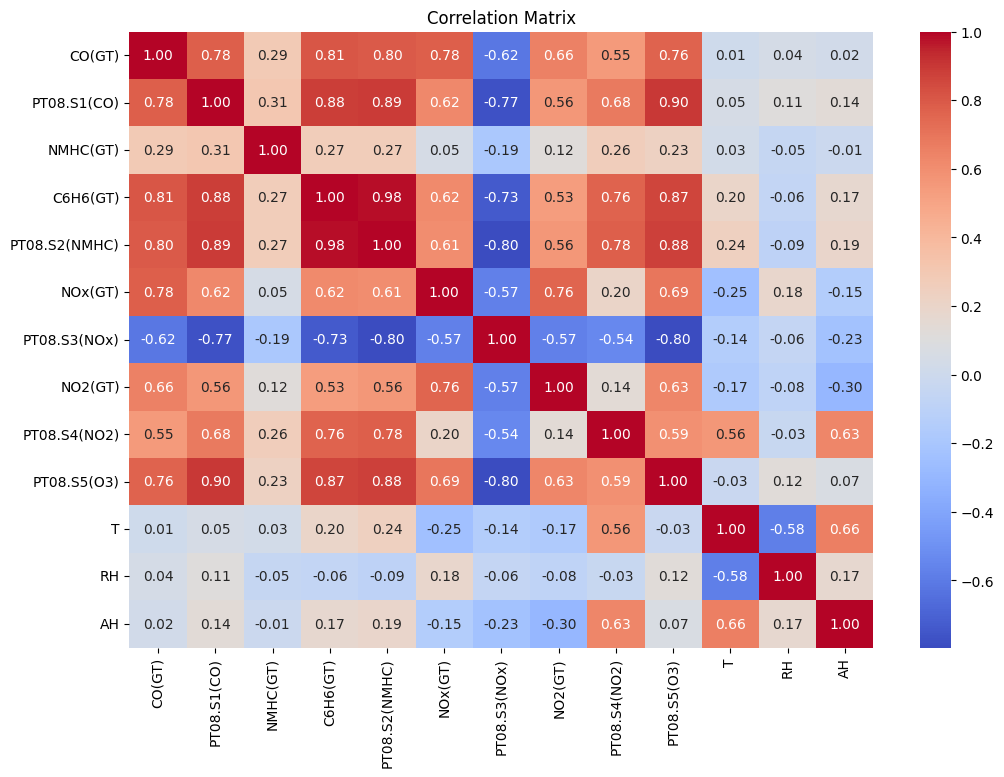

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular a matriz de correlação
correlation_matrix = arquivo.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
pip uninstall pycaret


In [ ]:
pip install pycaret --user


In [ ]:
from pycaret.regression import *

# Configuração do ambiente PyCaret
clf_setup = setup(df, target='CO(GT)', session_id=123, use_gpu=True)

# Comparar modelos
best_model = compare_models()

# Ajuste do melhor modelo
tuned_model = tune_model(best_model)

# Avaliação do modelo
evaluate_model(tuned_model)

# Fazer previsões
predictions = predict_model(tuned_model, data=df)